In [1]:
import pyforest

In [2]:
df = pd.read_csv("./cluster_mpg.csv")

df.head()

<IPython.core.display.Javascript object>

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
# gettig rid of unique identifier feature name
df = df.drop("name", axis=1)

In [4]:
# getting dummy variables for categorical features
df = pd.get_dummies(df)

<IPython.core.display.Javascript object>

In [5]:
# scaling data as MinMaxScaler in hierarcial clusturing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(data=scaler.fit_transform(df), columns=df.columns)

<IPython.core.display.Javascript object>

In [6]:
# trying find out best distance_threshold (if gonne used) for model

In [7]:
# theorical max distance
np.sqrt(len(scaled_df.columns))

<IPython.core.display.Javascript object>

3.1622776601683795

In [8]:
# discovering real max distance_threshold
scaled_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.384200,0.494388,0.326646,0.317768,0.386897,0.448888,0.498299,0.173469,0.201531,0.625000
std,0.207580,0.341157,0.270398,0.209191,0.240829,0.164218,0.306978,0.379136,0.401656,0.484742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.212766,0.200000,0.095607,0.157609,0.173589,0.343750,0.250000,0.000000,0.000000,0.000000
50%,0.365691,0.200000,0.214470,0.258152,0.337539,0.446429,0.500000,0.000000,0.000000,1.000000
75%,0.531915,1.000000,0.536822,0.434783,0.567550,0.537202,0.750000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data_a = scaled_df.iloc[scaled_df["cylinders"].idxmax()]
data_b = scaled_df.iloc[scaled_df["cylinders"].idxmin()]
dist = np.linalg.norm(data_a - data_b)
dist

<IPython.core.display.Javascript object>

1.8853266441320566

In [10]:
# deciding distance_threshold based on teorical and real distance as 2

In [11]:
# modeling
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=None, distance_threshold=2)

In [12]:
# cluster labels
labels = model.fit_predict(scaled_df)

In [13]:
# number of clusters
n_clusters = len(pd.Series(labels).unique())
n_clusters

<IPython.core.display.Javascript object>

11

In [14]:
# linkage_matrix and plotting dendogram
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

In [15]:
# linkage matrix
linkage_matrix = linkage(model.children_)

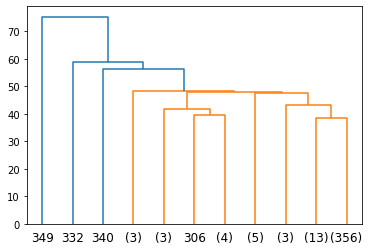

In [16]:
# plotting dendogram
dendrogram(linkage_matrix, truncate_mode='lastp',p=n_clusters);    

In [18]:
df["Clusters"] = labels

In [19]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa,Clusters
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1,3
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1,3
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1,3
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1,3
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,0,0,1,2
388,44.0,4,97.0,52.0,2130,24.6,82,1,0,0,8
389,32.0,4,135.0,84.0,2295,11.6,82,0,0,1,2
390,28.0,4,120.0,79.0,2625,18.6,82,0,0,1,2
